#  Assignment 6: Implementing SGD

**Shashi Sharma**, ss139529@gmail.com

In [432]:
import warnings
import seaborn
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
from sklearn.preprocessing import StandardScaler

In [433]:
X = load_boston() # Loading the boston price of home data.
Y = load_boston().target

In [434]:
print(X.data.shape)

(506, 13)


In [435]:
# The boston dataset has 506 rows and 13 columns.

In [436]:
print(X.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [437]:
Y # These are all our Yi's (target)
# The dataset is old. And the target numbers might look small. 

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [438]:
Y=pd.DataFrame(Y)

In [439]:
# This gives whole description of the data.
# This details by given by people who knows realstates.
print (X.DESCR) 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [440]:
# Loading the dataset into panda
X_bos= pd.DataFrame(X.data)
print(X_bos.head())

         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [441]:
# For this dataFrame X_bos, we are adding new column called Price.
# and adding Yi's into price
X_bos['Price']= Y
print(X_bos.head())

         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  Price  
0  396.90  4.98   24.0  
1  396.90  9.14   21.6  
2  392.83  4.03   34.7  
3  394.63  2.94   33.4  
4  396.90  5.33   36.2  


In [442]:
X= X_bos.drop('Price', axis=1) # Where X contains everything except the price column
Y= X_bos['Price'] # Y contains only Price.
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [443]:
#Splitting the data into into X_train and X_test
import sklearn
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


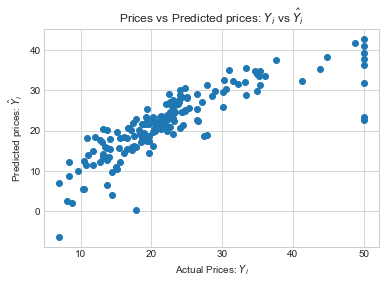

In [444]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
# Here we are not doing complex gridsearch or finding Hyperparameter anything.
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

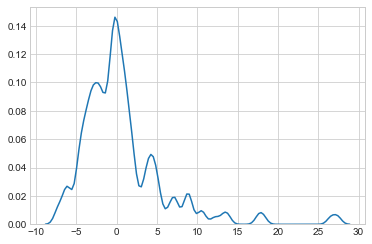

In [445]:
# Checking the differences between Y_test and Y_predicted:
# The plot gives us the pdf of the Delta Y's, which is nothing but the errors.
# Thus the plot gives distribution of errors.
delta_y = Y_test - Y_pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

- The most often found errors are center at Zero.
- Fewer errors on +ve side and more errors on -tive sides, which means the more number of predicted values are more than actual value.


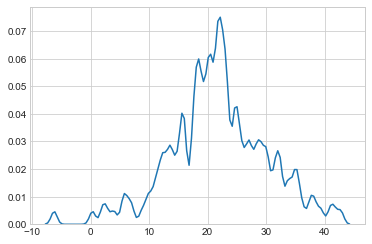

In [446]:
# Plotting the distribution of Y predicted.
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
plt.show()

- The Y_pred values has mean roughtly around 20.

## Implementing SGD algorithm for linear regression Manually:

In [447]:
Y_train

435    13.4
88     23.6
365    27.5
242    22.2
461    17.7
       ... 
486    19.1
189    34.9
495    23.1
206    24.4
355    20.6
Name: Price, Length: 339, dtype: float64

In [448]:
Y_train.reset_index(drop=True, inplace=True)
Y_train

0      13.4
1      23.6
2      27.5
3      22.2
4      17.7
       ... 
334    19.1
335    34.9
336    23.1
337    24.4
338    20.6
Name: Price, Length: 339, dtype: float64

In [449]:
X_train=X_train.as_matrix()
X_test=X_test.as_matrix()

In [450]:
Scaler = StandardScaler()
X_train_S = Scaler.fit_transform(X_train)
X_test_S=Scaler.transform(X_test)

In [451]:
X_train_S

array([[ 0.9118389 , -0.50241886,  1.07230484, ...,  0.80807825,
        -2.84295938,  1.52320257],
       [-0.41172732, -0.50241886, -1.12979483, ..., -0.30417427,
         0.42743634, -0.99523956],
       [ 0.12458293, -0.50241886,  1.07230484, ...,  0.80807825,
        -0.05335342, -0.76564608],
       ...,
       [-0.39713851, -0.50241886, -0.18839347, ...,  0.3446397 ,
         0.38630716,  0.71962537],
       [-0.3910951 , -0.50241886, -0.05347927, ...,  0.06657657,
         0.4043083 , -0.22000723],
       [-0.40576854,  3.07573229, -1.35465184, ...,  1.64226764,
         0.18977581, -0.98531886]])

In [452]:
df_train=pd.DataFrame(X_train_S)
df_train['price']=Y_train
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,0.911839,-0.502419,1.072305,-0.256978,1.633548,0.486034,0.962774,-0.823477,1.655334,1.552100,0.808078,-2.842959,1.523203,13.4
1,-0.411727,-0.502419,-1.129795,-0.256978,-0.552451,1.028078,0.668619,-0.183274,-0.871371,-0.802704,-0.304174,0.427436,-0.995240,23.6
2,0.124583,-0.502419,1.072305,-0.256978,1.441946,-3.913414,0.725324,-1.075955,1.655334,1.552100,0.808078,-0.053353,-0.765646,27.5
3,-0.406208,0.839388,-0.901940,-0.256978,-1.083710,0.097426,-0.515087,1.600509,-0.411970,-0.624310,-0.860301,0.152292,-0.184576,22.2
4,0.021742,-0.502419,1.072305,-0.256978,1.398401,0.123238,0.743044,-0.605107,1.655334,1.552100,0.808078,0.365116,0.301538,17.7


In [453]:
data=df_train
x=np.array(data.drop('price',axis=1))
y=np.array(data['price'])

In [454]:
#The parameters are: Weight(W), intercept (b), learning rate (r), iteration.
# We initialize W and B with Zero.
W=np.zeros(shape=(1,13))
B=0
iteration=500
r=0.01
N=339
for j in range(iteration):
    w=W
    b=B
    weight_vectors= np.zeros(shape=(1,13))
    intercept_b=0
    for i in range(N):
        weight_vectors+=((-2)*x[i])*(y[i]-(np.dot(w,x[i])+b)) # Formula of  dl/dw
        intercept_b+=(-2)*(y[i]-(np.dot(w,x[i])+b)) # formula of dl/db
        
    W=(w-r*(weight_vectors)/N)
    B=(b-r*(intercept_b)/N)
    
    j+=1
    
    
print(W)
print(B) 

[[-1.17320878  0.65583893 -0.5184886   0.23993403 -1.11545524  2.94623489
  -0.4244345  -2.51731439  1.54150521 -0.87183156 -2.05298442  1.02240166
  -3.28973686]]
[22.53624358]


In [455]:
#Predicting the value of X_test
#https://www.geeksforgeeks.org/numpy-asscalar-in-python/
Y_predic_LR=[]
for i in range(len(X_test_S)):
    Y_value=np.dot(W,X_test_S[i])+B  # corresponding from the formula "Y= wTx+b"
    Y_predic_LR.append(np.asscalar(Y_value))

In [456]:
Y_predic_LR[0:5]

[37.183043499441766,
 30.488358988444105,
 27.352464972458975,
 5.924582132655239,
 33.57406547762797]

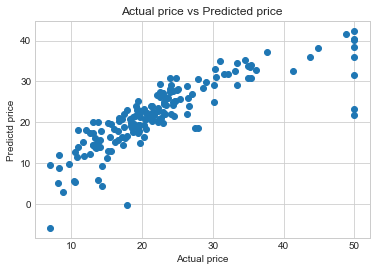

In [457]:
#Scatter plot of comparison between Actual price vs predicted price
plt.scatter(Y_test,Y_predic_LR)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()

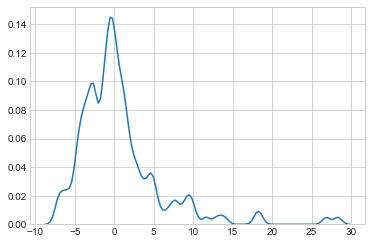

In [458]:
# Thus the plot gives distribution of errors.
delta_y1 = Y_test - Y_predic_LR;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y1), bw=0.5)
plt.show()

- The most often found errors are center round 20.
- More error on -tive sides,which means the more number of predicted values are more than actual value.

In [459]:
Mean_squared_error_LR= mean_squared_error(Y_test,Y_predic_LR)
print('Mean squared error of Manual SGD=',Mean_squared_error_LR)

Mean squared error of Manual SGD= 28.851190798224117


## SGD regression using Sklearn Implementation:

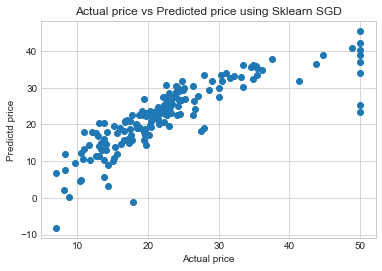

In [460]:
# Implement Sklearn SGD with similar parameters as used in manual SGD :

SGD_lr=SGDRegressor(penalty=None, eta0=0.01, max_iter=500, learning_rate='constant')
SGD_lr.fit(X_train_S,Y_train)
Y_pred_SGD=SGD_lr.predict(X_test_S)

#Scatter plot of Actual price vs Predicted price using Sklearn.

plt.scatter(Y_test,Y_pred_SGD)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price using Sklearn SGD')
plt.show()


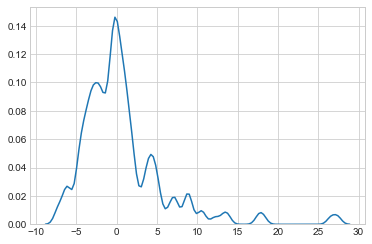

In [461]:
# Thus the plot gives distribution of errors.
delta_y2 = Y_test - Y_pred_SGD;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

- The most often found errors are center at Zero.
- Fewer errors on +ve side and more errors on -tive sides, which means the more number of predicted values are higher than actual value.

In [462]:
Mean_squared_error_sgd=mean_squared_error(Y_test,Y_pred_SGD)
print('Mean squared error of SKlearn SGD =',Mean_squared_error_sgd)

Mean squared error of SKlearn SGD = 29.10685182500235


In [463]:
# Weights of Sklearn SGD:
Weight_sgd=SGD_lr.coef_
Weight_sgd

array([-1.41903972,  1.03215021, -0.23507358,  0.53512351, -1.73516866,
        2.76116304, -0.6460743 , -2.73636046,  2.97780442, -2.03807087,
       -1.78980323,  1.26660033, -3.65617571])

In [464]:
#Comparison between weights obtained from own implementation and weights obtained from sgd implementation
from prettytable import PrettyTable    

xx = PrettyTable()
xx.field_names=['Sl no.','Weights of Manual SGD','Weights of Sklearn SGD']
for i in range(13):
    xx.add_row([i,W[0][i],Weight_sgd[i]])
print(xx)

+--------+-----------------------+------------------------+
| Sl no. | Weights of Manual SGD | Weights of Sklearn SGD |
+--------+-----------------------+------------------------+
|   0    |  -1.1732087785104226  |  -1.4190397202934755   |
|   1    |   0.6558389300344117  |   1.0321502062363448   |
|   2    |  -0.5184886028466948  |   -0.235073581531503   |
|   3    |    0.23993402547751   |   0.5351235107248623   |
|   4    |   -1.115455236429064  |    -1.7351686583829    |
|   5    |   2.946234890378397   |   2.761163039619127    |
|   6    |  -0.42443450349587636 |  -0.6460743038147013   |
|   7    |  -2.5173143913111207  |  -2.7363604620252406   |
|   8    |   1.5415052128807412  |   2.977804423950767    |
|   9    |   -0.871831559763731  |   -2.03807087454411    |
|   10   |  -2.0529844199759175  |  -1.7898032297397397   |
|   11   |   1.0224016622111278  |   1.2666003306985234   |
|   12   |  -3.2897368611923583  |  -3.6561757083512574   |
+--------+-----------------------+------

### Conclusion:

- From both the implementation, we can say that more number of the predicted values are greater than the actual values.
- The error distribution of Manual SGD and SKlearn SGD are almost same.
- Hence the MSE value of our SGD implementation and sklearn's implementation is approximately same.

## References:
- www.appliedaicourse.com
- www.stackoverflow.com